https://diagrams.github.io/doc/vector.html

# Vectors and points

In [1]:
{-# LANGUAGE NoMonomorphismRestriction #-}
{-# LANGUAGE FlexibleContexts          #-}
{-# LANGUAGE TypeFamilies              #-}

In [2]:
import Diagrams.Prelude
import Diagrams.Backend.Cairo.CmdLine

# Vectors

## Basics

Vectors are translation-invariant:

In [3]:
v = (5 ^& 6) :: V2 Double

In [4]:
translateX 20 v == v

True

In [5]:
[zero, unitX, unit_X, unitY, unit_Y] :: [V2 Double]

[V2 0.0 0.0,V2 1.0 0.0,V2 (-1.0) 0.0,V2 0.0 1.0,V2 0.0 (-1.0)]

Using ^& is annoying sometimes since type annotations often needed.
Alternatives:

In [6]:
V2 5 6

V2 5 6

Comes from $\mathbb{R}^2$ I assume:

In [7]:
r2 (5, 6)

V2 5 6

In [8]:
import Diagrams.TwoD.Vector

In [9]:
norm v *^ e (angleBetween unitX v)

V2 5.0 5.999999999999999

In [10]:
3 *^ e (pi @@ rad)

V2 (-3.0) 3.6739403974420594e-16

## Exercises

In [11]:
zigzag :: Int -> Diagram B
zigzag n = fromOffsets . take (n*2) $ cycle [V2 1 1, V2 1 (-1)]

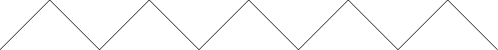

In [12]:
zigzag 5

In [13]:
arcOfCircles :: Diagram B
arcOfCircles = 
  let littleR = 1
      bigR = 5
  in mconcat $
    [ circle littleR # fc blue # translate (bigR *^ e (angle @@ rad))
    | angle <- [0, pi/6..pi] ] 

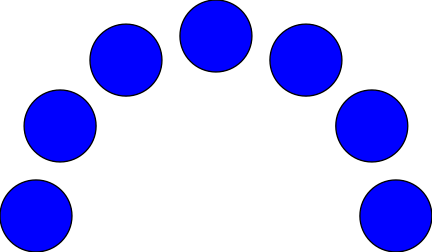

In [14]:
arcOfCircles

In [15]:
spokes :: Int -> [V2 Double]
spokes n = tail [r *^ e (a@@rad) | (r, a) <- zip (cycle [3, 2, 1]) [0, (2*pi/fromIntegral n)..2*pi] ]

In [16]:
result :: Diagram B
result = lwG 0.02 . mconcat . map (fromOffsets . (:zero)) $ spokes 30

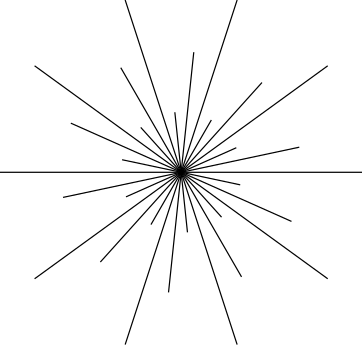

In [17]:
result

## Destructing

In [18]:
unr2 v

(5.0,6.0)

In [19]:
import Diagrams.Coordinates
coords v

5.0 :& 6.0

In [20]:
norm v

7.810249675906654

In [21]:
direction v

Dir (V2 5.0 6.0)

In [22]:
r2 (4, 5) ^+^ r2 (2, 3)

V2 6 8

In [23]:
negated (r2 (4, 5))

V2 (-4) (-5)

In [24]:
5 *^ V2 5 2

V2 25 10

In [25]:
v `dot` v == quadrance v

True

In [ ]:
quadrance $ project (V2 5 5) (V2 4 1)

In [ ]:
V2 4 1 `dot` V2 5 5

### Example

In [28]:
u = r2 (1,2)
v = 2 *^ (unitY # rotateBy (1/19))
p = project u v

drawV v = fromOffsets [v]

example = mconcat
  [ drawV p # lc green # lwG 0.03
  , drawV u # lc blue
  , drawV v # lc red
  , drawV (p ^-^ v) # translate v # dashingG [0.1,0.1] 0
  ]

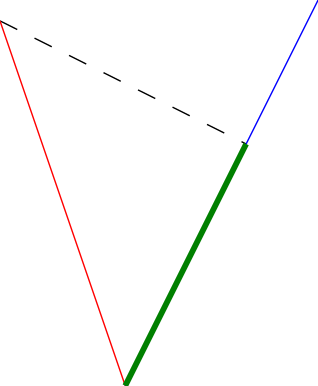

In [29]:
diagram example

### Exercises

In [48]:
vTriangle :: V2 Double -> V2 Double -> Diagram B
vTriangle v1 v2 = drawV v1 <> drawV v2 <> translate v2 (drawV v3)
  where v3 = v1 ^-^ v2

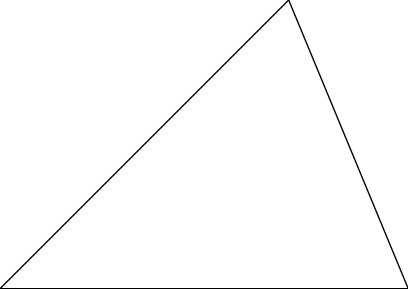

In [49]:
vTriangle unitX (unitX # rotateBy (1/8))

In [71]:
vectorAddition :: V2 Double -> V2 Double -> Diagram B
vectorAddition v1 v2 = drawV v1 # lc red
                    <> drawV v2 # lc green
                    <> drawV (v1 + v2) # lc orange
                    <> translate v1 (drawV v2) # lc green # dashingG [0.1, 0.1] 0
                    <> translate v2 (drawV v1) # lc red # dashingG [0.1, 0.1] 0

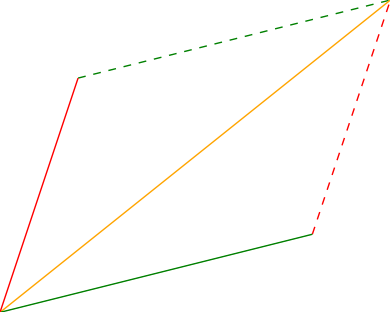

In [72]:
vectorAddition (V2 1 3) (V2 4 1)

# Points

In [80]:
p2 (2, 3)

P (V2 2 3)

We can translate points!

In [110]:
translate (V2 1 2) (p2 (4, 5))

P (V2 5 7)

In [90]:
pts :: [P2 Double]
pts = pentagon 10

In [104]:
d :: Diagram B
d = atPoints pts ([circle 3 # fc c | c <- [orange, green, blue, red, black]])

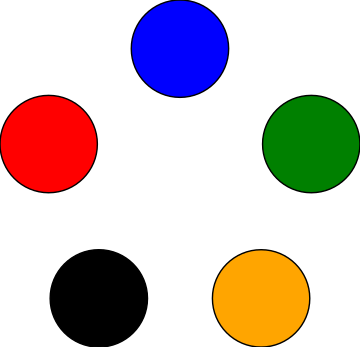

In [107]:
d 

In [111]:
p = p2 (4, 5)

In [112]:
p ^. _x

4

In [113]:
p ^. _y

5

In [116]:
p & _x +~ 4

P (V2 8 5)

In [115]:
V2 3 5 ^. _y

5

In [167]:
circleOfCircles :: Double -> Diagram B
circleOfCircles n = position 
  [ (pt, circle 0.5 # fc c) 
  | let n' = n-1
  , x <- [0..n']
  , y <- [0..n']
  , let pt = translate (V2 (-n'/2) (-n'/2)) (p2 (x, y))
  , let d = distance pt origin
  , let b = d <= (n'/2)
  , let c = if b then yellow else purple
--   , let c = blend (d/(n/2)) purple yellow
  ]

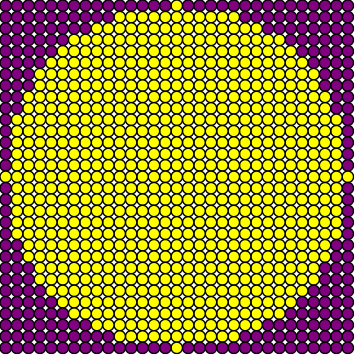

In [168]:
circleOfCircles 31

In [188]:
d :: Diagram B
d = origin ~~ p2 (3, 1)

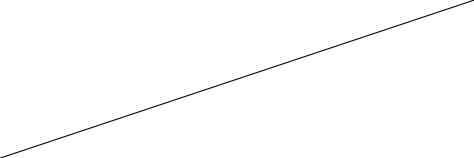

In [189]:
d